Import Dependencies

In [98]:
import pandas as pd
import numpy as np
import seaborn as sb

Import Datasets

In [92]:
data = pd.read_csv("Copy of Student-Employability-Datasets.csv")
df = pd.DataFrame(data)
data.head(5)

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable


In [89]:
data.dtypes

Name of Student               object
GENERAL APPEARANCE             int64
MANNER OF SPEAKING             int64
PHYSICAL CONDITION             int64
MENTAL ALERTNESS               int64
SELF-CONFIDENCE                int64
ABILITY TO PRESENT IDEAS       int64
COMMUNICATION SKILLS           int64
Student Performance Rating     int64
CLASS                         object
dtype: object

In [25]:
data.describe()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [45]:
data.shape

(2982, 10)

DATA PREPOCESSING

Menangani data null

In [27]:
data.isnull().sum()

Name of Student               0
GENERAL APPEARANCE            0
MANNER OF SPEAKING            0
PHYSICAL CONDITION            0
MENTAL ALERTNESS              0
SELF-CONFIDENCE               0
ABILITY TO PRESENT IDEAS      0
COMMUNICATION SKILLS          0
Student Performance Rating    0
CLASS                         0
dtype: int64

Menangani Outlier

In [111]:
from scipy import stats

zx1 = np.abs(stats.zscore(data['GENERAL APPEARANCE']))
zx2 = np.abs(stats.zscore(data['MANNER OF SPEAKING']))
zx3 = np.abs(stats.zscore(data['PHYSICAL CONDITION']))
zx4 = np.abs(stats.zscore(data['MENTAL ALERTNESS']))
zx5 = np.abs(stats.zscore(data['SELF-CONFIDENCE']))
zx6 = np.abs(stats.zscore(data['ABILITY TO PRESENT IDEAS']))
zy1 = np.abs(stats.zscore(data['Student Performance Rating']))
threshold = 3

##Menemukan Index pada Dataset yang terdektsi sebagai outlier
outlierx1 = np.where(zx1 > threshold)
outlierx2 = np.where(zx2 > threshold)
outlierx3 = np.where(zx3 > threshold)
outlierx4 = np.where(zx4 > threshold)
outlierx5 = np.where(zx5 > threshold)
outlierx6 = np.where(zx6 > threshold)
outliery1 = np.where(zy1 > threshold)

#Menghapus Nilai Outlier pada Dataset yang memiliki index sama dengan outlier
data = data.drop(data.index[outlierx1])
data = data.drop(data.index[outlierx2])
data = data.drop(data.index[outlierx3])
data = data.drop(data.index[outlierx4])
data = data.drop(data.index[outlierx5])
data = data.drop(data.index[outlierx6])
data = data.drop(data.index[outliery1])

data.shape

(2966, 10)

MEMISAHKAN FEATURE ANTARA INPUT DAN OUTPUT

Pada feature input dimasukan variabel x dan output pada variabel y

In [95]:
input = ['GENERAL APPEARANCE','MANNER OF SPEAKING','PHYSICAL CONDITION','MENTAL ALERTNESS','SELF-CONFIDENCE', 'ABILITY TO PRESENT IDEAS']
output = ['Student Performance Rating']
x = data[input]
y = data[output]

Melakukan Feature Selection Kepada Data Menggunakan metode Pearson Correlation

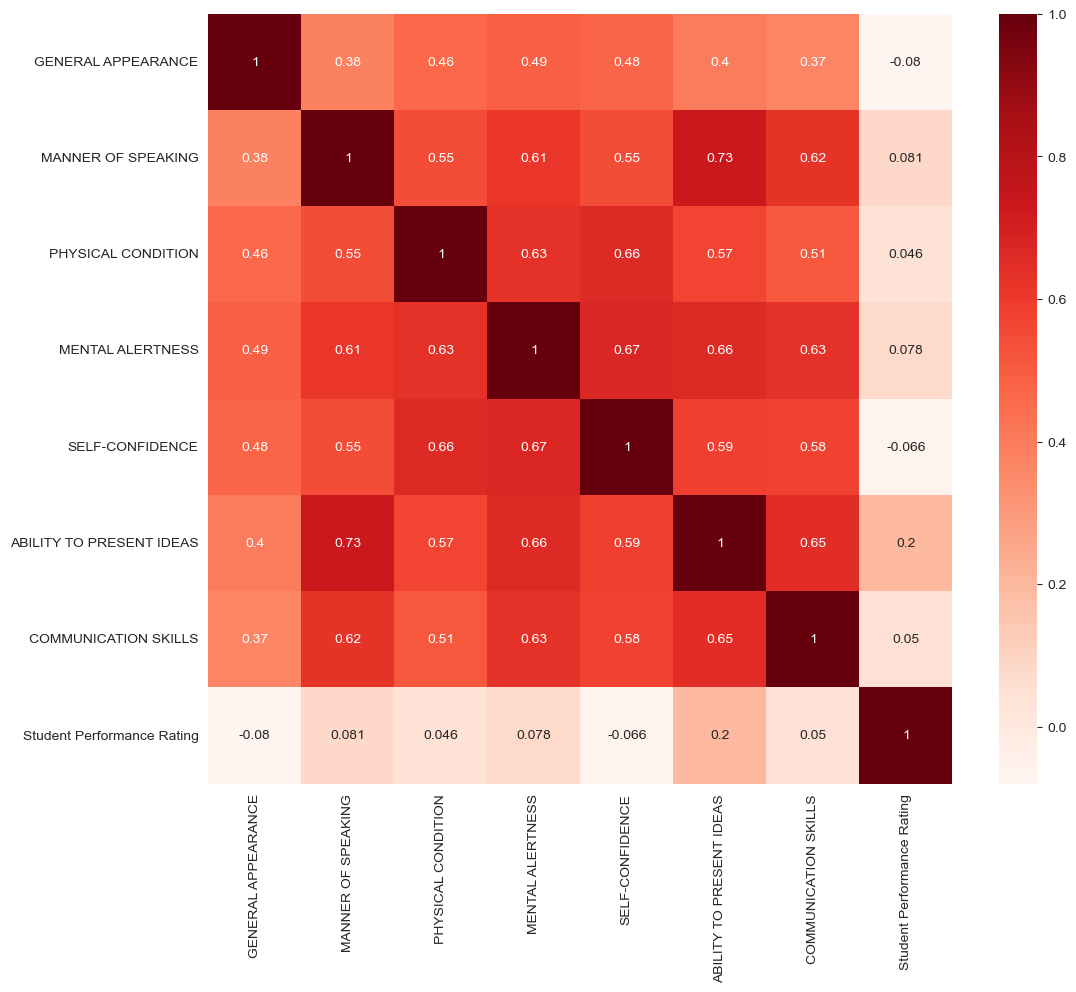

In [105]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,10))
cor = data.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [110]:
#Correlation with output variable
cor_target = abs(cor["Student Performance Rating"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Student Performance Rating    1.0
Name: Student Performance Rating, dtype: float64